# Project to Understand the Principal Component Analysis

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

Dimensions are nothing but features that represent the data. For example, A 28 X 28 image has 784 picture elements (pixels) that are the dimensions or features which together represent that image.

One important thing to note about PCA is that it is an Unsupervised dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels)

# 1. Importing the Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 2. Loading the Dataset

In [2]:
data = pd.read_csv("D://datasets/dermatology.csv", delimiter=",")

In [3]:
data.head()

,2,2.1,0,3,0.1,0.2,0.3,0.4,1,0.5,...,0.19,0.20,3.2,0.21,0.22,0.23,1.1,0.24,55,2.3
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2


#Rename the columns in human readable form. The details of the column names can be found in description

In [4]:

data.columns = ['erythema','scaling', 'definite borders', 'itching', 'koebner phenomenon', 'polygonal papules','follicular papules','oral mucosal involvement','knee and elbow involvement',
              'scalp involvement','family history(0 or 1)','melanin incontinence', 'eosinophils in the infiltrate','PNL infiltrate','fibrosis of the papillary dermis','exocytosis','acanthosis',
              'hyperkeratosis','parakeratosis','dlubbing of the rete ridges',
              'elongation of the rete ridges','thinning of the suprapapillary epidermis','spongiform pustule','munro microabcess','focal hypergranulosis','disappearance of the granular layer',
              'vacuolisation and damage of basal layer','spongiosis','saw-tooth appearance of retes',
              'follicular horn plug','perifollicular parakeratosis','inflammatory monoluclear inflitrate','band-like infiltrate','Age (linear)', 'Classcode']

In [5]:
data.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear),Classcode
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2


In [6]:
'''As we know the ClassCode is our target value, so we are going to save it'''
y=data['Classcode']
del data['Classcode']

In [7]:
#Print the y_train
y

0      1
1      3
2      1
3      3
4      2
      ..
360    4
361    4
362    3
363    3
364    1
Name: Classcode, Length: 365, dtype: int64

# 3. Structure of the Dataset

In [8]:
#Print the Describe function for the Dataframe
data.describe()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2.068493,1.794521,1.553425,1.361644,0.635616,0.449315,0.167123,0.378082,0.613699,0.520548,...,0.364384,0.394521,0.465753,0.457534,0.947945,0.454795,0.104110,0.115068,1.868493,0.556164
std,0.665656,0.702408,0.905126,1.136632,0.908653,0.958353,0.571304,0.835057,0.984120,0.906472,...,0.760525,0.850322,0.865743,0.955884,1.126615,0.955758,0.451018,0.489357,0.725682,1.107044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [9]:
#Print the shape of the Dataframe
data.shape

(365, 34)

In [10]:
#Print the shape of the y_train
y.shape

(365,)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  365 non-null    int64 
 1   scaling                                   365 non-null    int64 
 2   definite borders                          365 non-null    int64 
 3   itching                                   365 non-null    int64 
 4   koebner phenomenon                        365 non-null    int64 
 5   polygonal papules                         365 non-null    int64 
 6   follicular papules                        365 non-null    int64 
 7   oral mucosal involvement                  365 non-null    int64 
 8   knee and elbow involvement                365 non-null    int64 
 9   scalp involvement                         365 non-null    int64 
 10  family history(0 or 1)                    365 non-

## Missing or Null Points

In [12]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite borders                            0
itching                                     0
koebner phenomenon                          0
polygonal papules                           0
follicular papules                          0
oral mucosal involvement                    0
knee and elbow involvement                  0
scalp involvement                           0
family history(0 or 1)                      0
melanin incontinence                        0
eosinophils in the infiltrate               0
PNL infiltrate                              0
fibrosis of the papillary dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
dlubbing of the rete ridges                 0
elongation of the rete ridges               0
thinning of the suprapapillary epi

In [13]:
data.isna().sum()

erythema                                    0
scaling                                     0
definite borders                            0
itching                                     0
koebner phenomenon                          0
polygonal papules                           0
follicular papules                          0
oral mucosal involvement                    0
knee and elbow involvement                  0
scalp involvement                           0
family history(0 or 1)                      0
melanin incontinence                        0
eosinophils in the infiltrate               0
PNL infiltrate                              0
fibrosis of the papillary dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
dlubbing of the rete ridges                 0
elongation of the rete ridges               0
thinning of the suprapapillary epi

However, there are no missing values in this dataset as shown above. So we will proceed further

# 4. Exploration of the Dataset

In [14]:
#Unique of the 'ClassCode'
unique_class=y.unique()

print('The unique  value of the ClassCode is: ',unique_class)

The unique  value of the ClassCode is:  [1 3 2 5 4 6]


Let's analysis the 'ClassCode' in graphical Format

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


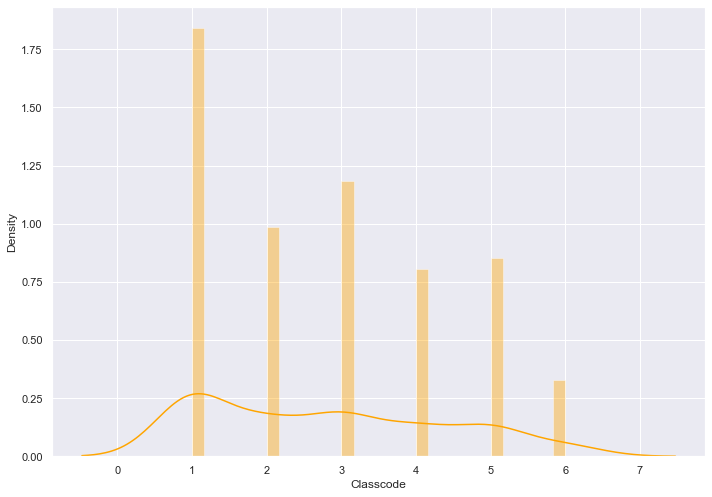

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(y, bins=30,color='orange')
plt.show()

From above we can see that, ClassCode with value '1' is more in number.

In [16]:
y.value_counts(ascending=False)

1    112
3     72
2     60
5     52
4     49
6     20
Name: Classcode, dtype: int64

Below is the information to understand what class code means.

Class Distribution:

Database:  Dermatology




     Class code:                      Class:                         Number of instances:
                                        
     1                                psoriasis                      112
 
         
     2                                seboreic dermatitis             61
 
 
     3                                lichen planus                   72
 
 
     4                                pityriasis rosea                49
 
 
     5                                cronic dermatitis               52    
 
 
     6                                pityriasis rubra pilaris        20

### Data Cleaning
Some part of the data has issues. Like the Age column. It has question marks against some values. Data cleaning is needed

In [17]:
data['Age (linear)'].unique()

array(['8', '26', '40', '45', '41', '18', '57', '22', '30', '20', '21',
       '10', '65', '38', '23', '17', '51', '42', '44', '33', '43', '50',
       '34', '?', '15', '46', '62', '35', '48', '12', '52', '60', '32',
       '19', '29', '25', '36', '13', '27', '31', '55', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [18]:
'''There is "?" in the Age(linear) Feature, trying to avoid''';

In [19]:
#Dataframe with "?" in Age(linear)
data[data['Age (linear)'] == '?']

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear)
32,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,?
33,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,?
34,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,?
35,2,1,2,3,2,3,0,2,0,0,...,1,0,2,0,2,0,0,0,3,?
261,2,1,0,2,0,0,0,0,0,0,...,0,0,0,2,0,0,0,3,0,?
262,1,1,1,3,0,0,0,0,0,0,...,0,0,0,3,0,0,0,2,0,?
263,1,1,0,2,0,0,0,0,1,0,...,0,0,0,2,0,0,0,3,0,?
264,1,1,0,3,0,0,0,0,0,0,...,0,0,0,2,0,0,0,3,0,?


In [20]:
#Replacing "?" with nan
data= data.replace('?', np.nan)

In [21]:
data[data.values == '?']

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear)


In [22]:
data[data['Age (linear)'].isna()]

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear)
32,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,NaN
33,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
34,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
35,2,1,2,3,2,3,0,2,0,0,...,1,0,2,0,2,0,0,0,3,NaN
261,2,1,0,2,0,0,0,0,0,0,...,0,0,0,2,0,0,0,3,0,NaN
262,1,1,1,3,0,0,0,0,0,0,...,0,0,0,3,0,0,0,2,0,NaN
263,1,1,0,2,0,0,0,0,1,0,...,0,0,0,2,0,0,0,3,0,NaN
264,1,1,0,3,0,0,0,0,0,0,...,0,0,0,2,0,0,0,3,0,NaN


In [23]:
data['Age (linear)'] = pd.to_numeric(data['Age (linear)'], errors='coerce')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 34 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  365 non-null    int64  
 1   scaling                                   365 non-null    int64  
 2   definite borders                          365 non-null    int64  
 3   itching                                   365 non-null    int64  
 4   koebner phenomenon                        365 non-null    int64  
 5   polygonal papules                         365 non-null    int64  
 6   follicular papules                        365 non-null    int64  
 7   oral mucosal involvement                  365 non-null    int64  
 8   knee and elbow involvement                365 non-null    int64  
 9   scalp involvement                         365 non-null    int64  
 10  family history(0 or 1)                

In [25]:
data['Age (linear)'].fillna(data['Age (linear)'].mean(),inplace=True)

In [26]:
data.dtypes

erythema                                      int64
scaling                                       int64
definite borders                              int64
itching                                       int64
koebner phenomenon                            int64
polygonal papules                             int64
follicular papules                            int64
oral mucosal involvement                      int64
knee and elbow involvement                    int64
scalp involvement                             int64
family history(0 or 1)                        int64
melanin incontinence                          int64
eosinophils in the infiltrate                 int64
PNL infiltrate                                int64
fibrosis of the papillary dermis              int64
exocytosis                                    int64
acanthosis                                    int64
hyperkeratosis                                int64
parakeratosis                                 int64
dlubbing of 

In [27]:
#Here we will create new dataframe with EP for correlation
correlation_df=data.copy()
correlation_df['Age (linear)']=y
correlation_df.head()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age (linear)
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,3,3
2,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,0,1
3,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,3,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,2


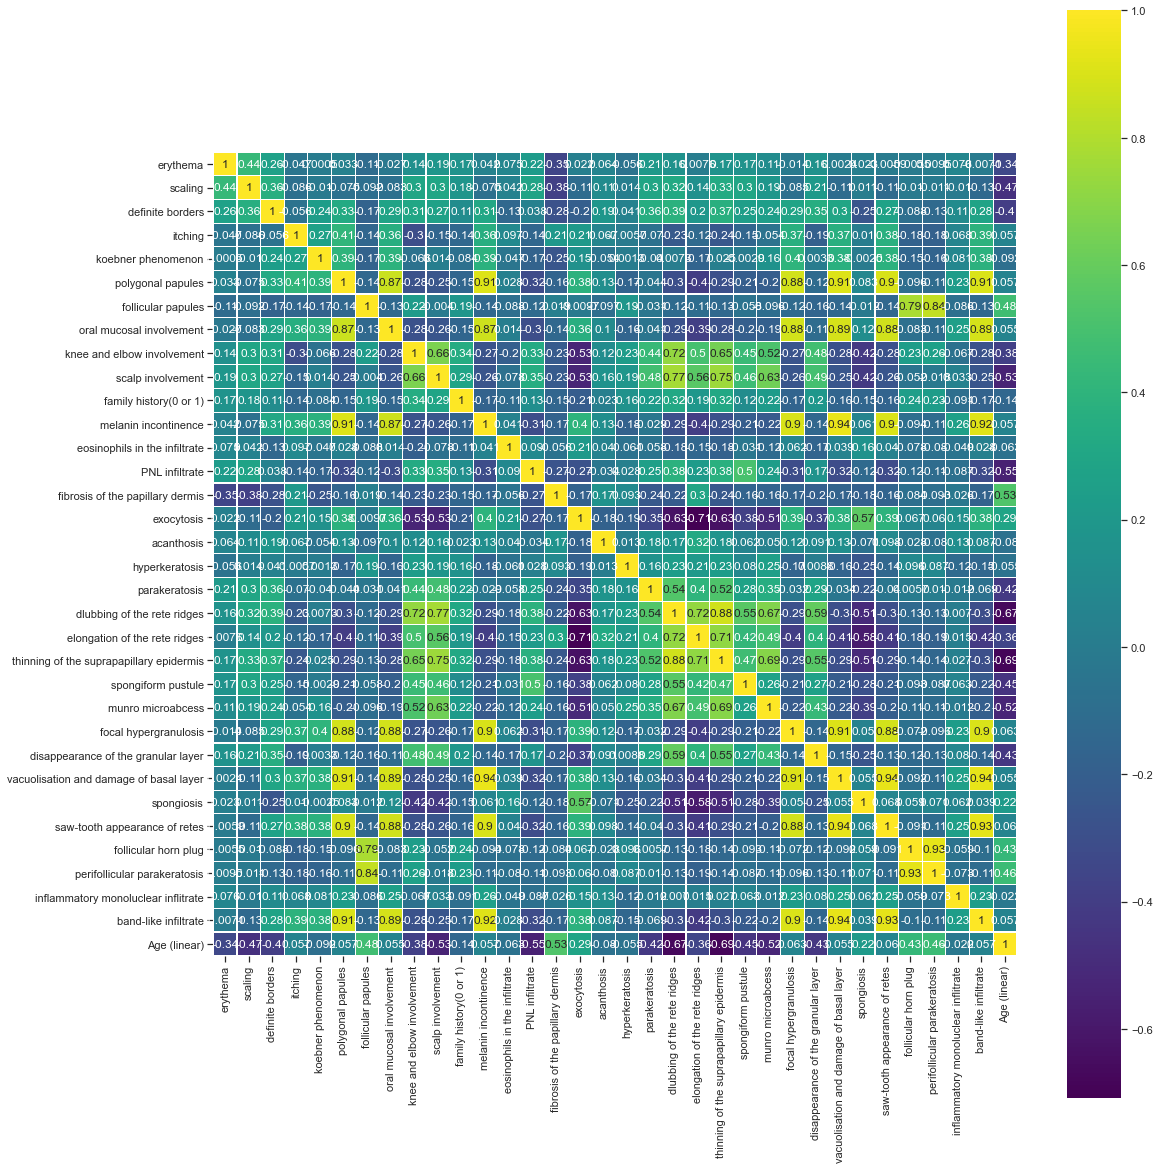

In [28]:
#Using the seaborn library for the heat map
sns.set(style='ticks', color_codes=True)
plt.figure(figsize=(18, 20))
sns.heatmap(correlation_df.astype(float).corr(), linewidths=0.1, square=True, linecolor='white', annot=True,cmap='viridis')
plt.show()

As we've noticed it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

# 5. Principal Component Analysis

In [29]:
#The Class code column is the value that needs to be predicted from the analysis. 
#Hence we will have to split X and y(Features and labels) based on this information
X = data.iloc[:,0:34]  # all rows, all the features and no labels
y=y # all rows, label only

In [30]:
scaled_data = StandardScaler().fit_transform(X)

In [31]:
#printing the scaled_data
print(scaled_data)

[[ 1.40130251  1.71856645  1.60039684 ... -1.19843846 -0.50307665
  -1.86748224]
 [-0.10303695 -1.13269152  0.4940619  ...  0.18146702  2.21056341
  -0.67731653]
 [-0.10303695  0.29293746  0.4940619  ...  1.56137251 -0.50307665
   0.24836791]
 ...
 [ 1.40130251  0.29293746  0.4940619  ...  0.18146702  2.21056341
  -0.54507589]
 [-0.10303695 -1.13269152  1.60039684 ...  0.18146702  2.21056341
   0.90957109]
 [ 1.40130251  0.29293746  0.4940619  ...  1.56137251 -0.50307665
  -0.08223367]]


In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=2)

In [34]:
principalComponents = pca.fit_transform(scaled_data)

In [35]:
#Creating the Dataframe having 1st principal & 2nd principal

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['1st principal','2nd principal'])

In [36]:
#creating new_dataframe for plotting labeled points
df = pd.concat([principalDf, y], axis = 1)
df.head()

,1st principal,2nd principal,Classcode
0,-3.175427,1.967773,1
1,5.234603,2.085009,3
2,-4.464604,2.839477,1
3,4.770307,2.892076,3
4,-0.185524,-1.391574,2


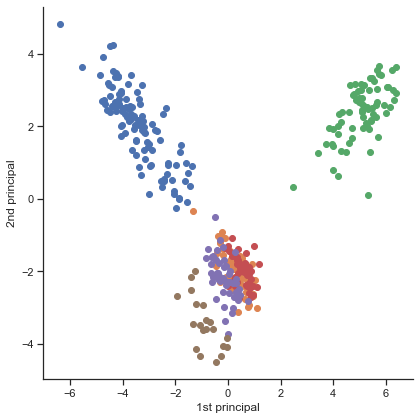

In [37]:
# ploting the 2d data points with seaborn
sns.FacetGrid(df, hue="Classcode", height=6).map(plt.scatter, '1st principal', '2nd principal')
plt.show()

In [38]:
## Explained Variance Ratio
pca.explained_variance_ratio_

array([0.27206076, 0.16102027])

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. 

# 6. Machine learning Model 

In [39]:
'''Here we are using Random Forest Classifier, for the prediction''';

## Splitting the Data

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['1st principal','2nd principal']], y, test_size=0.3, random_state=1)

In [41]:
#print the shape of training data
X_train.shape,y_train.shape

((255, 2), (255,))

In [42]:
#print the shape of testing data
X_test.shape,y_test.shape

((110, 2), (110,))

## Importing library for the Classifier Model

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
clf=RandomForestClassifier()
clf

RandomForestClassifier()

In [45]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
clf.score(X_test, y_test)

0.8

In [47]:
### PCA v2:

In [48]:
pca_2 = PCA(n_components=5)

In [49]:
principalComponents_2 = pca_2.fit_transform(scaled_data)

In [50]:
principalComponents_2

array([[-3.1754265 ,  1.96777272,  0.92016694, -1.38906455, -0.28076195],
       [ 5.23460335,  2.08500908,  0.59897237,  0.37785088, -0.06379081],
       [-4.46460422,  2.83947654,  0.05511892, -1.09929654, -1.05657586],
       ...,
       [ 6.27990923,  2.99073094,  0.44665351, -0.9349014 , -1.1223746 ],
       [ 5.47122092,  2.50633115,  0.32057447,  0.5806223 ,  0.87871196],
       [-4.53137543,  3.14117446,  0.3879667 , -0.30768114, -0.11322595]])

In [51]:
## Explained Variance Ratio
pca_2.explained_variance_ratio_

array([0.27206076, 0.16102027, 0.09137407, 0.06566526, 0.03945082])

In [52]:
#Creating the Dataframe having 1st principal & 2nd principal

principalDf_2 = pd.DataFrame(data = principalComponents_2
             , columns = ['1st principal','2nd principal','3rd principal','4th principal', '5th principal',])

In [53]:
#creating new_dataframe for plotting labeled points
df = pd.concat([principalDf_2, y], axis = 1)
df.head()

,1st principal,2nd principal,3rd principal,4th principal,5th principal,Classcode
0,-3.175427,1.967773,0.920167,-1.389065,-0.280762,1
1,5.234603,2.085009,0.598972,0.377851,-0.063791,3
2,-4.464604,2.839477,0.055119,-1.099297,-1.056576,1
3,4.770307,2.892076,0.361829,-0.465644,0.443557,3
4,-0.185524,-1.391574,-0.838098,-3.280432,-1.635987,2


## Machine learning Model 

In [54]:
'''Here we are using Random Forest Classifier, for the prediction''';

## Splitting the Data

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], y, test_size=0.3, random_state=1)

In [56]:
#print the shape of training data
X_train.shape,y_train.shape

((255, 5), (255,))

In [57]:
#print the shape of testing data
X_test.shape,y_test.shape

((110, 5), (110,))

## Importing library for the Classifier Model

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
clf=RandomForestClassifier()
clf

RandomForestClassifier()

In [60]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
clf.score(X_test, y_test)

0.9545454545454546

## Summary :
### We have successfully used the Dermatology data set and build PCA model with an accuracy of 95.45%